# Importing the Libraries and the Dataset

In [31]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#reading the dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')
print(data.shape)
data.head()

(2318, 11)


,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


From the dataset preview, Price is the dependent variable and the rest are independent variables

In [33]:
data.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

There are no missing values in the dataset

# Checking cardinality of independent categorical variables in the dataset

In [34]:
print('Unique elements in mark are',data['mark'].unique())
print('Unique elements in model are',data['model'].unique())
print('Unique elements in transmission are',data['transmission'].unique())
print('Unique elements in mileage are',data['mileage'].unique())
print('Unique elements in year are',data['year'].unique())
print('Unique elements in drive are',data['drive'].unique())
print('Unique elements in hand_drive are',data['hand_drive'].unique())
print('Unique elements in fuel are',data['fuel'].unique())

Unique elements in mark are ['nissan' 'toyota' 'daihatsu' 'volkswagen' 'mazda' 'honda' 'subaru'
 'mercedes-benz' 'kubota' 'mitsubishi' 'suzuki' 'bmw' 'chrysler' 'smart'
 'gm' 'opel' 'isuzu' 'land rover' 'peugeot' 'hyundai' 'kia motors' 'audi'
 'citroen' 'mitsuoka' 'volvo' 'ford' 'hino' 'jaguar']
Unique elements in model are ['march' 'lafesta' 'avensis' 'mira' 'passat' 'bongo van' 'step wgn'
 'sambar' 'inspire' 'mercedes-benz others' 'note' 'passo' 'impreza'
 'kubota others' 'life' 'progres' 'cube cubic' 'cube' 'a-class' 'coltplus'
 'mr wagon' 'pajero mini' 'fit' 'legacy b4' 'vitz' 'mark ii blit'
 'insight' 'move' 'tanto' 'terios kid' 'az-wagon' 'coo' 'verisa' 'swift'
 'delica d2' 'tiida' 'sienta' 'mini' 'colt' 'platz' 'bluebird sylphy'
 'eclipse' 'bb' 'moco' 'clipper truck' 'esse' 'ek wagon' 'polo' 'x-trail'
 'atenza sport' 'ad van' 'pixis space' 'freed spike' 'stream' 'alto'
 'raum' 'wish' 'every' 'demio' 'jimny' 'premacy' 'cr-v' 'lapin' 'delica'
 'wagon r' 'lancer' 'naked' 'odyssey' 

In [35]:
print('Unique elements in mark are',data['mark'].nunique())
 #28 unique elements 
#so, rather than encoding it, we can just drop this columbn as it doesn' make sense

Unique elements in mark are 28


In [36]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [37]:
data.drop(columns=['mark', 'id','model','year'],axis=1,inplace=True)
data.head()

,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,80000,1240,at,2wd,rhd,gasoline
1,110,53000,1200,at,2wd,rhd,gasoline
2,165,47690,2000,at,2wd,rhd,gasoline
3,190,130661,1990,at,2wd,rhd,gasoline
4,190,66300,660,at,2wd,rhd,gasoline


In [39]:
#drive,transmission,hand_drive,fuel converting on categorical columns
data.replace({'drive':{'2wd':0,'4wd':1,'awd':2},'transmission':{'at':1,'mt':2,'cvt':3},'hand_drive':{'rhd':1,'center':0,'lhd':2},'fuel':{'gasoline':1,'diesel':2,'hybrid':3,'lpg':4,'cng':5}},inplace=True)

In [40]:
data

,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,80000,1240,1,0,1,1
1,110,53000,1200,1,0,1,1
2,165,47690,2000,1,0,1,1
3,190,130661,1990,1,0,1,1
4,190,66300,660,1,0,1,1
...,...,...,...,...,...,...,...
2313,1400,121000,996,1,0,1,1
2314,1400,101000,3000,1,0,1,1
2315,1400,101000,660,3,0,1,1
2316,1400,170000,660,1,1,1,1


In [42]:
data.columns

Index(['price', 'mileage', 'engine_capacity', 'transmission', 'drive',
       'hand_drive', 'fuel'],
      dtype='object')

In [43]:
# Dataset Correlation
data.corr()

,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
price,1.000000,0.021581,0.173748,0.022787,0.046591,0.074800,0.046505
mileage,0.021581,1.000000,0.130362,0.023681,0.116351,0.027251,0.167041
engine_capacity,0.173748,0.130362,1.000000,-0.107955,0.055608,0.084154,0.091162
transmission,0.022787,0.023681,-0.107955,1.000000,0.161085,-0.018636,0.015812
drive,0.046591,0.116351,0.055608,0.161085,1.000000,-0.022804,-0.000673
hand_drive,0.074800,0.027251,0.084154,-0.018636,-0.022804,1.000000,0.255047
fuel,0.046505,0.167041,0.091162,0.015812,-0.000673,0.255047,1.000000


# Data Visualization and Correlation

<AxesSubplot:>

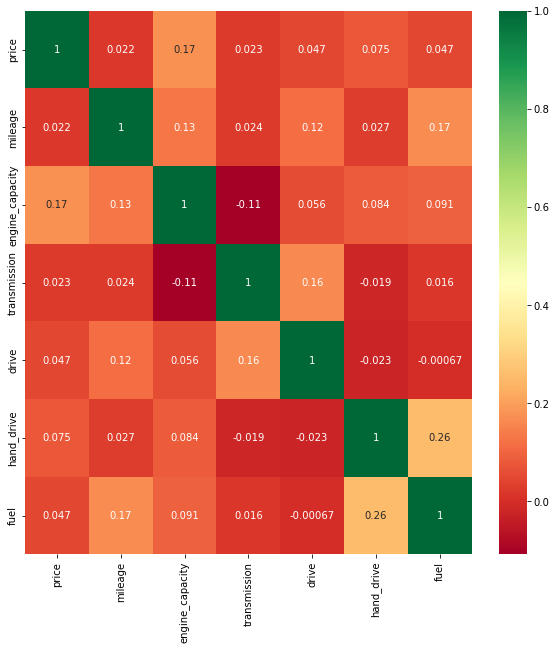

In [44]:
#Correlations of features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Making DataFrame for the Nominal Data

In [46]:
car_visualization_nominal=data[['price', 'mileage', 'engine_capacity', 'transmission', 'drive',
       'hand_drive', 'fuel']].copy()

In [49]:
car_visualization_nominal.columns

Index(['price', 'mileage', 'engine_capacity', 'transmission', 'drive',
       'hand_drive', 'fuel'],
      dtype='object')

# EDA and Visualization of data

112000    18
81000     17
68000     16
92000     16
94000     15
          ..
52600      1
157802     1
101977     1
147272     1
72320      1
Name: mileage, Length: 1367, dtype: int64


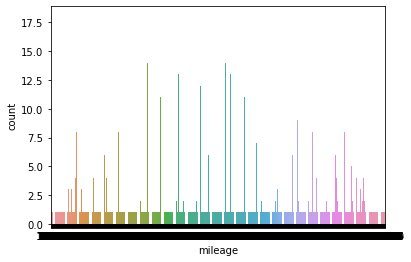

In [53]:
ax=sns.countplot(x='mileage',data=car_visualization_nominal)
print(car_visualization_nominal['mileage'].value_counts())

0    2121
1     192
2       5
Name: drive, dtype: int64


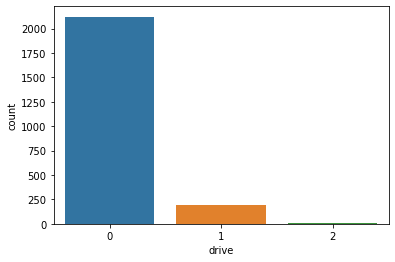

In [52]:
ax=sns.countplot(x='drive',data=car_visualization_nominal)
print(car_visualization_nominal['drive'].value_counts())

1    2290
2      18
4       7
3       2
5       1
Name: fuel, dtype: int64


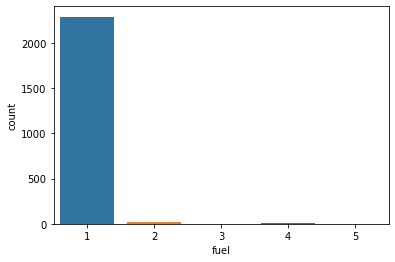

In [48]:
ax=sns.countplot(x='fuel',data=car_visualization_nominal)
print(car_visualization_nominal['fuel'].value_counts())

1    2301
2      16
0       1
Name: hand_drive, dtype: int64


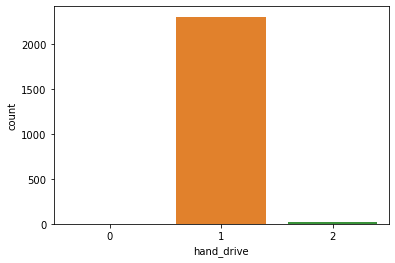

In [50]:
ax=sns.countplot(x='hand_drive',data=car_visualization_nominal)
print(car_visualization_nominal['hand_drive'].value_counts())

1300    468
1500    433
2000    197
1000    168
660     159
       ... 
1986      1
798       1
1587      1
1270      1
1999      1
Name: engine_capacity, Length: 93, dtype: int64


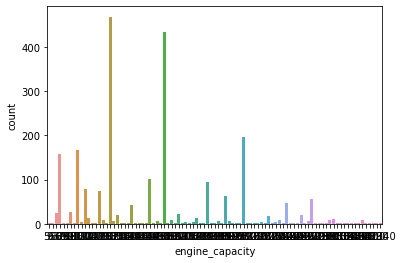

In [51]:
ax=sns.countplot(x='engine_capacity',data=car_visualization_nominal)
print(car_visualization_nominal['engine_capacity'].value_counts())

In [54]:
sell=data['price']
data.drop(['price'], axis=1, inplace=True)
data=data.join(sell)
data.head()

,mileage,engine_capacity,transmission,drive,hand_drive,fuel,price
0,80000,1240,1,0,1,1,80
1,53000,1200,1,0,1,1,110
2,47690,2000,1,0,1,1,165
3,130661,1990,1,0,1,1,190
4,66300,660,1,0,1,1,190


In [57]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

[0.7729346  0.19557572 0.01294293 0.00872943 0.00644453 0.0033728 ]


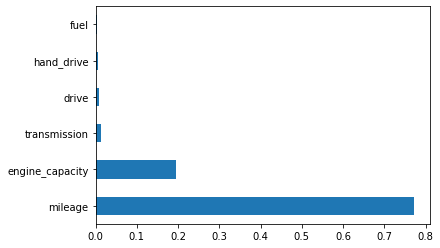

In [58]:
### To determine important features, make use of ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model Building and Training

In [60]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=3)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Decision Tree Score on Training set is 0.9230914928114983
Decision Tree Score on Test Set is -0.6205450177732654
[-0.68329743 -0.57206988 -0.76254211 -0.60443839 -0.85833216]
Accuracy: -69.61 %
Standard Deviation: 10.46 %
Mean Absolute Error: 288.3387212643678
Mean Squared Error: 135423.34876875798
RMSE: 367.99911517387915
The r2_score is -0.6205450177732654


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


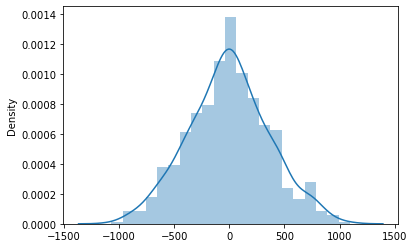

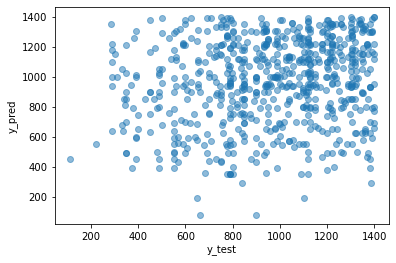

In [63]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Random Forest Regressor

Random Forest Score on Training set is 0.4292385716275018
Random Forest Score on Test Set is 0.006443304846003528
[ 0.0981618   0.16455662 -0.03939666  0.01095684 -0.12354949]
Accuracy: 2.21 %
Standard Deviation: 10.12 %
Mean Absolute Error: 231.34358032647108
Mean Squared Error: 83028.10065360341
RMSE: 288.14597108688406
The r2_score is 0.006443304846003528


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


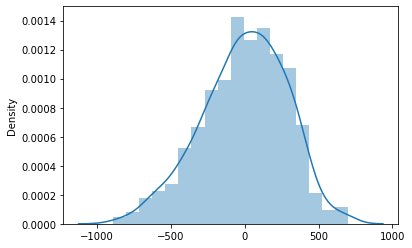

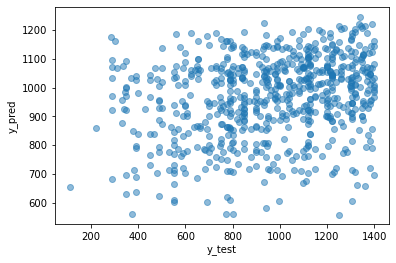

In [64]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2,
max_features='auto', max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(rf_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Voting Regressor

Voting Regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset to average the individual predictions to form a final prediction.

Voting Regresssor Score on Training set is 0.7994795360513404
Voting Regresssor Score on Test Set is -0.16391230791408673
[-0.14700346 -0.02181846 -0.25423472 -0.13275593 -0.33661561]
Accuracy: -17.85 %
Standard Deviation: 10.80 %
Mean Absolute Error: 247.4530803035385
Mean Squared Error: 97264.13069812821
RMSE: 311.87197805851076
The r2_score is -0.16391230791408673


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


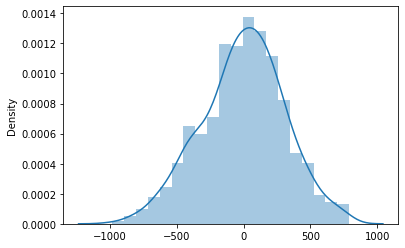

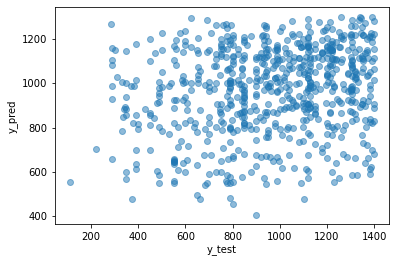

In [65]:
from sklearn.ensemble import VotingRegressor
vot_reg = VotingRegressor([('DecisionTree', dt_reg), ('RandomForestRegressor', rf_reg)])
vot_reg.fit(X_train, y_train)
y_pred=vot_reg.predict(X_test)

print("Voting Regresssor Score on Training set is",vot_reg.score(X_train, y_train))#Training Accuracy
print("Voting Regresssor Score on Test Set is",vot_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(vot_reg, X_train, y_train, cv = 5)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Dump the model selected as a Pickle File

In [71]:
import pickle
pickle.dump(vot_reg, open("vot_reg.pkl", "wb"))

# load model from file
model = pickle.load(open("vot_reg.pkl", "rb"))

model.predict([[66300, 1200, 1, 2,1,110,]])

array([527.74109409])

# end